In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure

## Read Dataset

In [13]:
data = pd.read_excel('Downloads/Analytics test.xlsx')
data.head()

,Date,Product Name,Daily Sales,Daily Forecast
0,2018-01-01,Product A,100990.8,93000
1,2018-01-02,Product A,113184.0,112000
2,2018-01-03,Product A,118389.6,121000
3,2018-01-04,Product A,152053.2,153000
4,2018-01-05,Product A,164354.4,156000


In [14]:
data.isnull().value_counts() #### No nulls

Date   Product Name  Daily Sales  Daily Forecast
False  False         False        False             3580
dtype: int64

#### How many products

In [15]:
print(data['Product Name'].nunique()) ### 7 products
list(data['Product Name'].unique())

7


['Product A',
 'Product B',
 'Product C',
 'Product D',
 'Product E',
 'Product F',
 'Product G']

<AxesSubplot:xlabel='Date'>

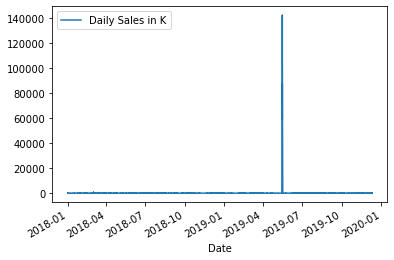

In [16]:
data['Daily Sales in K'] = data['Daily Sales']/1000
data.plot(x='Date', y='Daily Sales in K')

<AxesSubplot:xlabel='Date'>

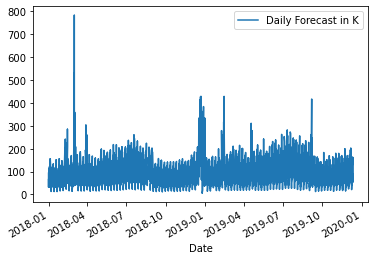

In [17]:
data['Daily Forecast in K'] = data['Daily Forecast']/1000
data.plot(x='Date', y='Daily Forecast in K')

## Difference between Sales and Forecast Daily

In [18]:
data[data['Daily Sales'] < data['Daily Forecast']].count() # --> 2011
data[data['Daily Sales'] > data['Daily Forecast']].count() # --> 1569
data[data['Daily Sales'] == data['Daily Forecast']].count() # --> 0

Date                   0
Product Name           0
Daily Sales            0
Daily Forecast         0
Daily Sales in K       0
Daily Forecast in K    0
dtype: int64

In [19]:
data['diff'] = data['Daily Sales'] - data['Daily Forecast']
data.head()

,Date,Product Name,Daily Sales,Daily Forecast,Daily Sales in K,Daily Forecast in K,diff
0,2018-01-01,Product A,100990.8,93000,100.9908,93.0,7990.8
1,2018-01-02,Product A,113184.0,112000,113.1840,112.0,1184.0
2,2018-01-03,Product A,118389.6,121000,118.3896,121.0,-2610.4
3,2018-01-04,Product A,152053.2,153000,152.0532,153.0,-946.8
4,2018-01-05,Product A,164354.4,156000,164.3544,156.0,8354.4


## The Spike


### Let's check when the spike occurs
    

In [20]:
data[data['Daily Sales'] > 1000000][['Date','Product Name','Daily Sales', 'Daily Forecast']]

,Date,Product Name,Daily Sales,Daily Forecast
500,2019-05-16,Product A,87696960.0,132000
1149,2019-05-16,Product C,119558400.0,140000
1859,2019-05-16,Product D,142506000.0,136000
2569,2019-05-16,Product E,59529600.0,130000
3279,2019-05-16,Product F,91728000.0,143000
3534,2019-05-16,Product G,102648000.0,145000


### Drop the Spike

In [21]:
# Drop the spike
data = data[data['Date'] != '2019-05-16']

## Diff between Sales and Forecast

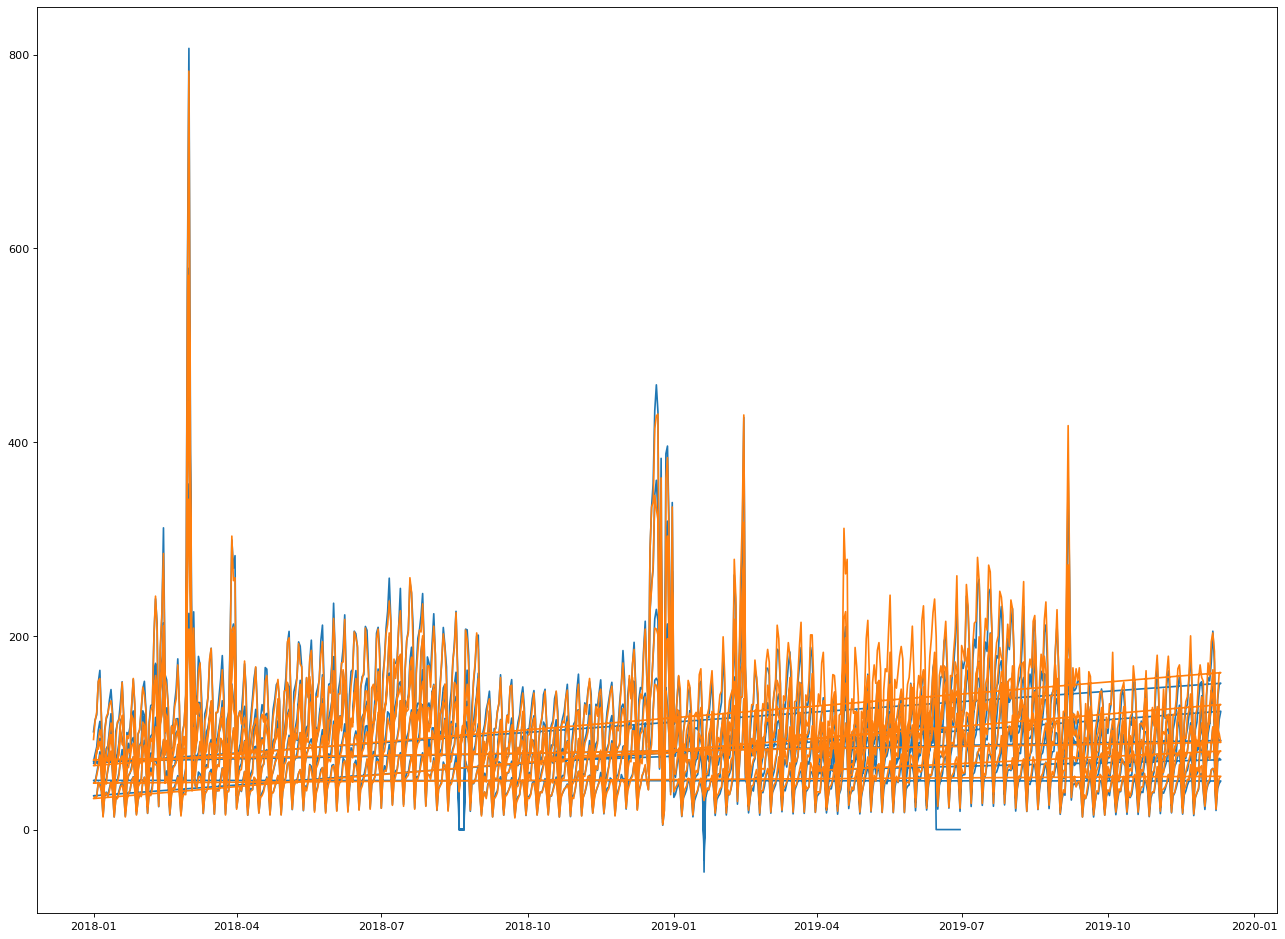

In [22]:
figure(figsize=(20, 15), dpi=80)

plt.plot(data['Date'], data['Daily Sales']/1000)
plt.plot(data['Date'], data['Daily Forecast']/1000)


## Aggregate Data Per Month

In [23]:
data['month'] = pd.DatetimeIndex(data['Date']).month
data['year'] = pd.DatetimeIndex(data['Date']).year
data.head()

<ipython-input-23-59eca3e294d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = pd.DatetimeIndex(data['Date']).month
<ipython-input-23-59eca3e294d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.DatetimeIndex(data['Date']).year


,Date,Product Name,Daily Sales,Daily Forecast,Daily Sales in K,Daily Forecast in K,diff,month,year
0,2018-01-01,Product A,100990.8,93000,100.9908,93.0,7990.8,1,2018
1,2018-01-02,Product A,113184.0,112000,113.1840,112.0,1184.0,1,2018
2,2018-01-03,Product A,118389.6,121000,118.3896,121.0,-2610.4,1,2018
3,2018-01-04,Product A,152053.2,153000,152.0532,153.0,-946.8,1,2018
4,2018-01-05,Product A,164354.4,156000,164.3544,156.0,8354.4,1,2018


## Sales Per month

In [24]:
Monthly_Data = pd.DataFrame(data.groupby(['month', 'year'])['Daily Sales'].sum()/1000000).reset_index()
Monthly_Data.columns = ['Month', 'Year', 'Monthly Sales in Million']
Monthly_Data

,Month,Year,Monthly Sales in Million
0,1,2018,11.156553
1,1,2019,10.950523
2,2,2018,12.968214
3,2,2019,13.753321
4,3,2018,19.507878
5,3,2019,13.615325
6,4,2018,11.776699
7,4,2019,13.463548
8,5,2018,14.960457
9,5,2019,14.866671


<AxesSubplot:xlabel='Month', ylabel='Monthly Sales in Million'>

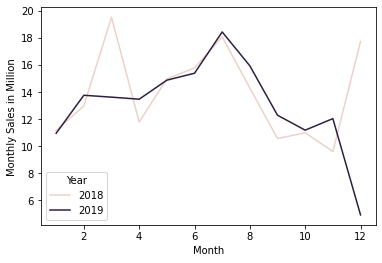

In [25]:
sns.lineplot(data=Monthly_Data, x='Month', y='Monthly Sales in Million', hue='Year')

## Forecast per month

In [26]:
Monthly_Data['Monthly Forecast in Million'] = list(data.groupby(['month', 'year'])['Daily Forecast'].sum()/1000000)
Monthly_Data.columns = ['Month', 'Year', 'Monthly Sales in Million', 'Monthly Forecast in Million']
Monthly_Data


,Month,Year,Monthly Sales in Million,Monthly Forecast in Million
0,1,2018,11.156553,10.830
1,1,2019,10.950523,11.918
2,2,2018,12.968214,12.539
3,2,2019,13.753321,14.479
4,3,2018,19.507878,18.818
5,3,2019,13.615325,14.621
6,4,2018,11.776699,11.376
7,4,2019,13.463548,16.394
8,5,2018,14.960457,14.448
9,5,2019,14.866671,18.170


<AxesSubplot:xlabel='Month', ylabel='Monthly Forecast in Million'>

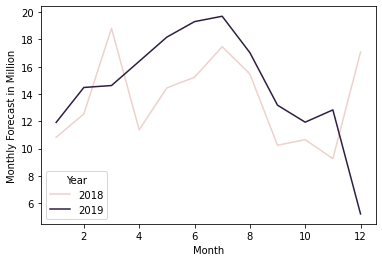

In [27]:
sns.lineplot(data=Monthly_Data, x='Month', y='Monthly Forecast in Million', hue='Year')

### Difference between Monthly and Forecast sales

In [28]:
Diff = Monthly_Data['Monthly Sales in Million'] - Monthly_Data['Monthly Forecast in Million']
Diff

0     0.326553
1    -0.967477
2     0.429214
3    -0.725679
4     0.689878
5    -1.005675
6     0.400699
7    -2.930452
8     0.512457
9    -3.303329
10    0.538618
11   -3.926269
12    0.592305
13   -1.275201
14   -1.186120
15   -1.108766
16    0.319907
17   -0.899707
18    0.329468
19   -0.756045
20    0.341779
21   -0.804035
22    0.642352
23   -0.283820
dtype: float64

<AxesSubplot:>

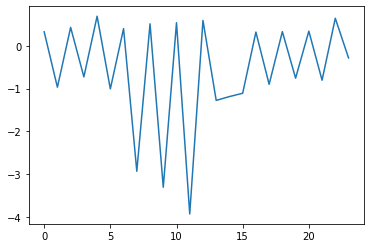

In [29]:
Diff.plot(x = range(0,12), y = Diff)

In [30]:
Monthly_Data.head()

,Month,Year,Monthly Sales in Million,Monthly Forecast in Million
0,1,2018,11.156553,10.830
1,1,2019,10.950523,11.918
2,2,2018,12.968214,12.539
3,2,2019,13.753321,14.479
4,3,2018,19.507878,18.818


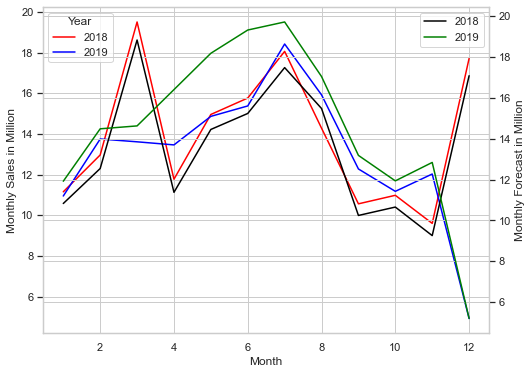

In [31]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid")
sns.lineplot(data=Monthly_Data, x='Month', y='Monthly Sales in Million', hue='Year', palette=['red','blue'])
ax2 = plt.twinx()
sns.lineplot(data=Monthly_Data, x='Month', y='Monthly Forecast in Million', hue='Year', ax=ax2, palette=['black','green'])
ax2.legend(loc=0)

## Yearly Data

In [32]:
Yearly_Data = pd.DataFrame(data.groupby('year')['Daily Sales'].sum()/1000000).reset_index()
Yearly_Data.columns = ['Year', 'Yearly Sales in Million']

Yearly_Data['Yearly Forecast in Million'] = list(data.groupby('year')['Daily Forecast'].sum()/1000000)
Yearly_Data.columns = ['Year', 'Yearly Sales in Million', 'Yearly Forecast in Million']
Yearly_Data


,Year,Yearly Sales in Million,Yearly Forecast in Million
0,2018,167.355109,163.418
1,2019,156.797546,174.784


in 2018 and 2019 the yearly aggreagted sales are less than the forecasted and the total sales in 2019 is less than 2018

# Sales per Product

## Monthly Aggregation

In [33]:
Product_Sales_Monthly = pd.DataFrame(data.groupby(['Product Name', 'month', 'year'])['Daily Sales'].sum()/1000000).reset_index()
Product_Sales_Monthly.columns = ['Product Name', 'Month', 'Year', 'Monthly Sales in Million']

Product_Sales_Monthly['Monthly Forecast in Million'] = list(data.groupby(['Product Name', 'month', 'year'])['Daily Forecast'].sum()/1000000)
Product_Sales_Monthly.columns = ['Product Name', 'Month', 'Year', 'Monthly Sales in Million', 'Monthly Forecast in Million']
Product_Sales_Monthly


,Product Name,Month,Year,Monthly Sales in Million,Monthly Forecast in Million
0,Product A,1,2018,3.427812,3.363
1,Product A,1,2019,3.383273,3.661
2,Product A,2,2018,3.951574,3.862
3,Product A,2,2019,4.282202,4.489
4,Product A,3,2018,6.072007,5.800
...,...,...,...,...,...
116,Product F,12,2018,3.457643,3.339
117,Product F,12,2019,0.756230,0.793
118,Product G,4,2019,2.337385,2.472
119,Product G,5,2019,2.632014,2.817


In [34]:
Product_Sales_Monthly.to_csv('Product_Sales_Monthly.csv')

## Yearly Aggregation

In [35]:
Product_Sales_yearly = pd.DataFrame(data.groupby(['Product Name', 'year'])['Daily Sales'].sum()/1000000).reset_index()
Product_Sales_yearly.columns = ['Product Name', 'Year', 'Yearly Sales in Million']
Product_Sales_yearly['Yearly Forecast in Million'] = list(data.groupby(['Product Name', 'year'])['Daily Forecast'].sum()/1000000)
Product_Sales_yearly.columns = ['Product Name', 'Year', 'Yearly Sales in Million', 'Yearly Forecast in Million']
Product_Sales_yearly


,Product Name,Year,Yearly Sales in Million,Yearly Forecast in Million
0,Product A,2018,53.680910,52.185
1,Product A,2019,42.778109,51.302
2,Product B,2018,28.717058,28.135
3,Product C,2019,31.769871,33.838
4,Product D,2018,40.093867,39.066
5,Product D,2019,36.044447,38.343
6,Product E,2018,17.822165,17.620
7,Product E,2019,15.994963,17.216
8,Product F,2018,27.041108,26.412
9,Product F,2019,23.953061,25.625


In [47]:
pieLabels = list(Product_Sales_yearly['Product Name'].unique())
product2018 = np.array(Product_Sales_yearly[Product_Sales_yearly['Year']==2018]['Yearly Sales in Million'])
Product_Sales_yearly[Product_Sales_yearly['Year']==2018]


,Product Name,Year,Yearly Sales in Million,Yearly Forecast in Million
0,Product A,2018,53.680910,52.185
2,Product B,2018,28.717058,28.135
4,Product D,2018,40.093867,39.066
6,Product E,2018,17.822165,17.620
8,Product F,2018,27.041108,26.412


<AxesSubplot:xlabel='Product Name', ylabel='Yearly Sales in Million'>

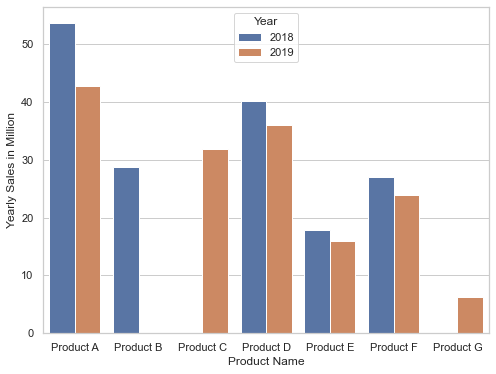

In [48]:
sns.barplot(data=Product_Sales_yearly, x='Product Name', y='Yearly Sales in Million', hue='Year')

In [49]:
Product_Sales_Monthly.reset_index()
Product_Sales_Monthly.set_index(['Year','Month'])#,'Product Name'

Product Name  Monthly Sales in Million  Monthly Forecast in Million
Year Month                                                                    
2018 1        Product A                  3.427812                        3.363
2019 1        Product A                  3.383273                        3.661
2018 2        Product A                  3.951574                        3.862
2019 2        Product A                  4.282202                        4.489
2018 3        Product A                  6.072007                        5.800
...                 ...                       ...                          ...
     12       Product F                  3.457643                        3.339
2019 12       Product F                  0.756230                        0.793
     4        Product G                  2.337385                        2.472
     5        Product G                  2.632014                        2.817
     6        Product G                  1.287696                        3.171

[121 rows x 3 columns]

In [50]:
maxProductSales = maxProductSales.reset_index()

NameError: name 'maxProductSales' is not defined

Text(0.5, 1.0, 'Highest Sales per month in 2018')

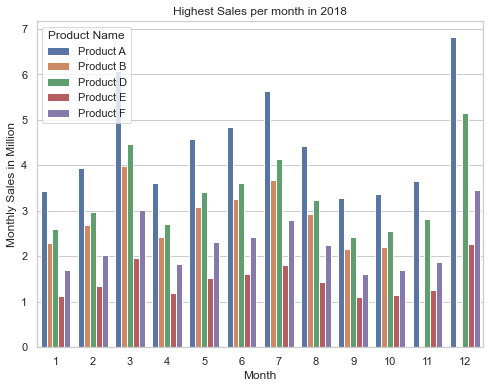

In [51]:
#2018
sns.barplot(data=Product_Sales_Monthly[Product_Sales_Monthly['Year'] == 2018], x='Month', y='Monthly Sales in Million', hue='Product Name')
plt.title('Highest Sales per month in 2018')

Text(0.5, 1.0, 'Highest Sales per month in 2019')

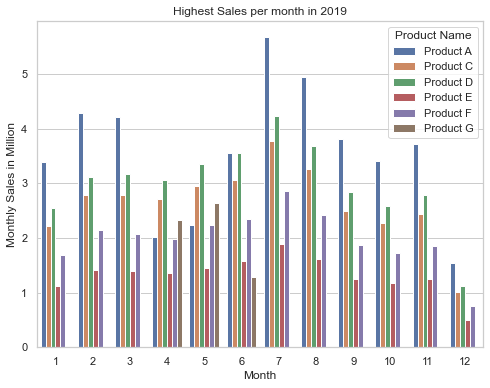

In [52]:
#2019
sns.barplot(data=Product_Sales_Monthly[Product_Sales_Monthly['Year'] == 2019], x='Month', y='Monthly Sales in Million', hue='Product Name')

plt.title('Highest Sales per month in 2019')

# Achieved Target or Not

In [53]:
Achieved = Product_Sales_Monthly[Product_Sales_Monthly['Monthly Sales in Million'] > Product_Sales_Monthly['Monthly Forecast in Million'] ]
NotAchieved = Product_Sales_Monthly[Product_Sales_Monthly['Monthly Sales in Million'] < Product_Sales_Monthly['Monthly Forecast in Million'] ]

In [54]:
Achieved[Achieved['Month'] == 1]

,Product Name,Month,Year,Monthly Sales in Million,Monthly Forecast in Million
0,Product A,1,2018,3.427812,3.363
24,Product B,1,2018,2.290522,2.195
46,Product D,1,2018,2.605134,2.506
70,Product E,1,2018,1.136027,1.106
94,Product F,1,2018,1.697058,1.660


In [55]:
Achieved[Achieved['Year'] == 2019]

,Product Name,Month,Year,Monthly Sales in Million,Monthly Forecast in Million


Nothing achieved in 2019 for all products

In [56]:
NotAchieved[NotAchieved['Year'] == 2018]#['Month'].unique()

,Product Name,Month,Year,Monthly Sales in Million,Monthly Forecast in Million
14,Product A,8,2018,4.428517,4.616
31,Product B,8,2018,2.923400,3.149
60,Product D,8,2018,3.228750,3.450
84,Product E,8,2018,1.445102,1.744
108,Product F,8,2018,2.260110,2.513


In [57]:
Achieved[Achieved['Year'] == 2018]['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12])